# Emotion Detection - KDEF - K-Fold

Tester: Muhammad Aditya Bayhaqie

[Reference](https://paperswithcode.com/paper/facial-emotion-recognition-using-transfer)

## Library Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## Import Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/CollabData/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download stevemarcelloliem/kdef-raf-fer-complete

Dataset URL: https://www.kaggle.com/datasets/stevemarcelloliem/kdef-raf-fer-complete
License(s): MIT
100% 648M/649M [00:06<00:00, 197MB/s]
100% 649M/649M [00:06<00:00, 98.0MB/s]


In [7]:
!unzip kdef-raf-fer-complete.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Val/happy/Training_88720851.jpg_processed.jpg  
  inflating: Val/happy/Training_88776166.jpg_processed.jpg  
  inflating: Val/happy/Training_88800063.jpg_processed.jpg  
  inflating: Val/happy/Training_88873273.jpg_processed.jpg  
  inflating: Val/happy/Training_88917842.jpg_processed.jpg  
  inflating: Val/happy/Training_88964675.jpg_processed.jpg  
  inflating: Val/happy/Training_89046745.jpg_processed.jpg  
  inflating: Val/happy/Training_89107622.jpg_processed.jpg  
  inflating: Val/happy/Training_89184566.jpg_processed.jpg  
  inflating: Val/happy/Training_8939285.jpg_processed.jpg  
  inflating: Val/happy/Training_89460378.jpg_processed.jpg  
  inflating: Val/happy/Training_89632094.jpg_processed.jpg  
  inflating: Val/happy/Training_89635895.jpg_processed.jpg  
  inflating: Val/happy/Training_89641436.jpg_processed.jpg  
  inflating: Val/happy/Training_89752835.jpg_processed.jpg  
  inflating: Val/happy/Trai

In [8]:
train_dir = '/content/Train'
test_dir ='/content/Val'

## Model w/ VGG 16

### Data Engineering

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [10]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [12]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

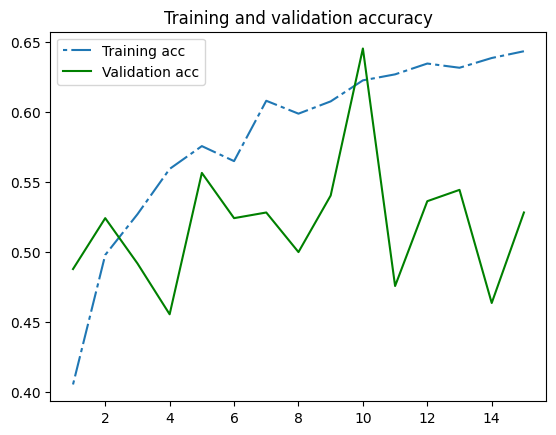

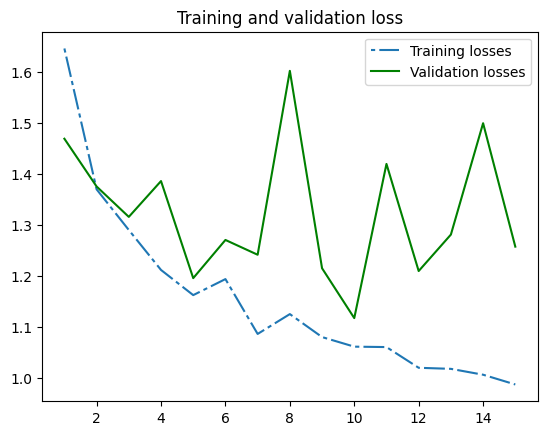

In [13]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [17]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - categorical_accuracy: 0.6755 - loss: 0.9502 - val_categorical_accuracy: 0.6089 - val_loss: 1.1214
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - categorical_accuracy: 0.7137 - loss: 0.8279 - val_categorical_accuracy: 0.6048 - val_loss: 1.0618
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.7224 - loss: 0.7960 - val_categorical_accuracy: 0.6048 - val_loss: 1.1666
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7407 - loss: 0.7595 - val_categorical_accuracy: 0.6492 - val_loss: 0.9973
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7494 - loss: 0.7328 - val_categorical_accuracy: 0.6452 - val_loss: 1.0214
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7437 - loss: 0.7490 - val_categorical_accuracy: 0.6331 - val_loss: 1.2043
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_a

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.7819 - loss: 0.6470 - val_categorical_accuracy: 0.6290 - val_loss: 1.0586
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - categorical_accuracy: 0.7621 - loss: 0.7056 - val_categorical_accuracy: 0.6331 - val_loss: 1.0723
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7686 - loss: 0.6715 - val_categorical_accuracy: 0.6774 - val_loss: 0.9505
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.7695 - loss: 0.6884 - val_categorical_accuracy: 0.5968 - val_loss: 1.0520
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7951 - loss: 0.6334 - val_categorical_accuracy: 0.6129 - val_loss: 1.0694
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - categorical_accuracy: 0.8087 - loss: 0.5844 - val_categorical_accuracy: 0.6411 - val_loss: 1.1317
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - categorical_accuracy: 0.8303 - loss: 0.5051 - val_categorical_accuracy: 0.6774 - val_loss: 1.0358
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - categorical_accuracy: 0.8277 - loss: 0.5111 - val_categorical_accuracy: 0.5887 - val_loss: 1.1391
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - categorical_accuracy: 0.8409 - loss: 0.4964 - val_categorical_accuracy: 0.5968 - val_loss: 1.2359
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.8368 - loss: 0.5081 - val_categorical_accuracy: 0.6250 - val_loss: 1.0345
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8370 - loss: 0.4946 - val_categorical_accuracy: 0.5847 - val_loss: 1.1721
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8584 - loss: 0.4603 - val_categorical_accuracy: 0.6371 - val_loss: 1.1772
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - categorical_accuracy: 0.8691 - loss: 0.4115 - val_categorical_accuracy: 0.6210 - val_loss: 1.2011
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8683 - loss: 0.4227 - val_categorical_accuracy: 0.6089 - val_loss: 1.2240
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8605 - loss: 0.4275 - val_categorical_accuracy: 0.6411 - val_loss: 1.1727
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.8788 - loss: 0.4068 - val_categorical_accuracy: 0.6210 - val_loss: 1.1167
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8892 - loss: 0.3754 - val_categorical_accuracy: 0.5726 - val_loss: 1.1952
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8841 - loss: 0.3762 - val_categorical_accuracy: 0.6048 - val_loss: 1.1897
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9103 - loss: 0.3233 - val_categorical_accuracy: 0.6169 - val_loss: 1.1691
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9000 - loss: 0.3333 - val_categorical_accuracy: 0.6250 - val_loss: 1.1305
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9123 - loss: 0.3033 - val_categorical_accuracy: 0.6411 - val_loss: 1.1720
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9071 - loss: 0.3049 - val_categorical_accuracy: 0.6573 - val_loss: 1.0391
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9166 - loss: 0.2884 - val_categorical_accuracy: 0.6169 - val_loss: 1.2186
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9241 - loss: 0.2690 - val_categorical_accuracy: 0.6734 - val_loss: 1.1544
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9395 - loss: 0.2378 - val_categorical_accuracy: 0.5968 - val_loss: 1.2848
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9282 - loss: 0.2543 - val_categorical_accuracy: 0.6290 - val_loss: 1.2780
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9361 - loss: 0.2415 - val_categorical_accuracy: 0.5887 - val_loss: 1.4441
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9358 - loss: 0.2401 - val_categorical_accuracy: 0.6331 - val_loss: 1.1741
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9487 - loss: 0.2147 - val_categorical_accuracy: 0.6613 - val_loss: 1.1046
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9426 - loss: 0.2157 - val_categorical_accuracy: 0.6532 - val_loss: 1.0973
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.9518 - loss: 0.2018 - val_categorical_accuracy: 0.6129 - val_loss: 1.3388
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9469 - loss: 0.1952 - val_categorical_accuracy: 0.6613 - val_loss: 1.1657
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9519 - loss: 0.1881 - val_categorical_accuracy: 0.6250 - val_loss: 1.3986


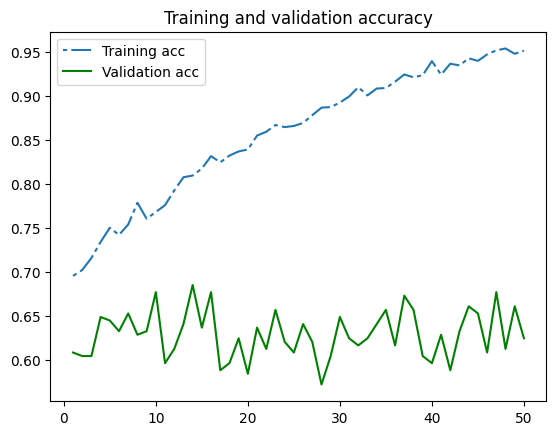

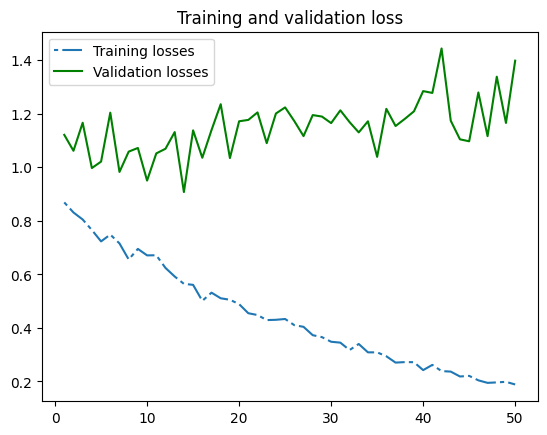

In [18]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model w/ VGG 16 Full Build

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

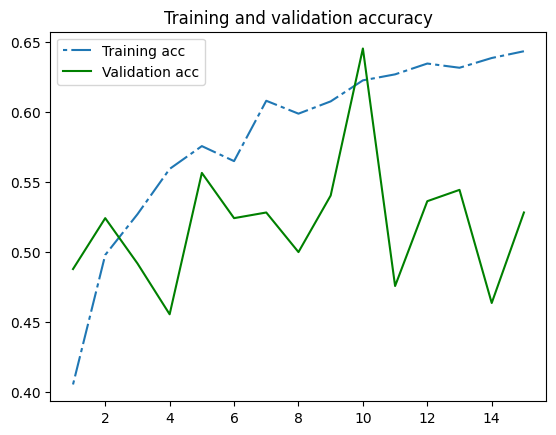

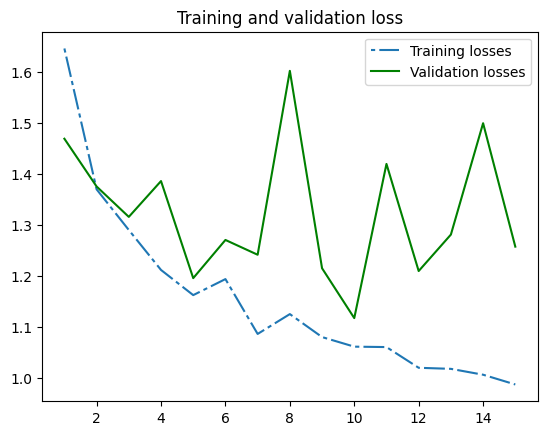

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - categorical_accuracy: 0.6755 - loss: 0.9502 - val_categorical_accuracy: 0.6089 - val_loss: 1.1214
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - categorical_accuracy: 0.7137 - loss: 0.8279 - val_categorical_accuracy: 0.6048 - val_loss: 1.0618
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.7224 - loss: 0.7960 - val_categorical_accuracy: 0.6048 - val_loss: 1.1666
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7407 - loss: 0.7595 - val_categorical_accuracy: 0.6492 - val_loss: 0.9973
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7494 - loss: 0.7328 - val_categorical_accuracy: 0.6452 - val_loss: 1.0214
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7437 - loss: 0.7490 - val_categorical_accuracy: 0.6331 - val_loss: 1.2043
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_a

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.7819 - loss: 0.6470 - val_categorical_accuracy: 0.6290 - val_loss: 1.0586
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - categorical_accuracy: 0.7621 - loss: 0.7056 - val_categorical_accuracy: 0.6331 - val_loss: 1.0723
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7686 - loss: 0.6715 - val_categorical_accuracy: 0.6774 - val_loss: 0.9505
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.7695 - loss: 0.6884 - val_categorical_accuracy: 0.5968 - val_loss: 1.0520
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7951 - loss: 0.6334 - val_categorical_accuracy: 0.6129 - val_loss: 1.0694
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - categorical_accuracy: 0.8087 - loss: 0.5844 - val_categorical_accuracy: 0.6411 - val_loss: 1.1317
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - categorical_accuracy: 0.8303 - loss: 0.5051 - val_categorical_accuracy: 0.6774 - val_loss: 1.0358
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - categorical_accuracy: 0.8277 - loss: 0.5111 - val_categorical_accuracy: 0.5887 - val_loss: 1.1391
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - categorical_accuracy: 0.8409 - loss: 0.4964 - val_categorical_accuracy: 0.5968 - val_loss: 1.2359
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.8368 - loss: 0.5081 - val_categorical_accuracy: 0.6250 - val_loss: 1.0345
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8370 - loss: 0.4946 - val_categorical_accuracy: 0.5847 - val_loss: 1.1721
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8584 - loss: 0.4603 - val_categorical_accuracy: 0.6371 - val_loss: 1.1772
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - categorical_accuracy: 0.8691 - loss: 0.4115 - val_categorical_accuracy: 0.6210 - val_loss: 1.2011
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8683 - loss: 0.4227 - val_categorical_accuracy: 0.6089 - val_loss: 1.2240
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8605 - loss: 0.4275 - val_categorical_accuracy: 0.6411 - val_loss: 1.1727
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.8788 - loss: 0.4068 - val_categorical_accuracy: 0.6210 - val_loss: 1.1167
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8892 - loss: 0.3754 - val_categorical_accuracy: 0.5726 - val_loss: 1.1952
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8841 - loss: 0.3762 - val_categorical_accuracy: 0.6048 - val_loss: 1.1897
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9103 - loss: 0.3233 - val_categorical_accuracy: 0.6169 - val_loss: 1.1691
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9000 - loss: 0.3333 - val_categorical_accuracy: 0.6250 - val_loss: 1.1305
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9123 - loss: 0.3033 - val_categorical_accuracy: 0.6411 - val_loss: 1.1720
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9071 - loss: 0.3049 - val_categorical_accuracy: 0.6573 - val_loss: 1.0391
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9166 - loss: 0.2884 - val_categorical_accuracy: 0.6169 - val_loss: 1.2186
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9241 - loss: 0.2690 - val_categorical_accuracy: 0.6734 - val_loss: 1.1544
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9395 - loss: 0.2378 - val_categorical_accuracy: 0.5968 - val_loss: 1.2848
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9282 - loss: 0.2543 - val_categorical_accuracy: 0.6290 - val_loss: 1.2780
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9361 - loss: 0.2415 - val_categorical_accuracy: 0.5887 - val_loss: 1.4441
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9358 - loss: 0.2401 - val_categorical_accuracy: 0.6331 - val_loss: 1.1741
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9487 - loss: 0.2147 - val_categorical_accuracy: 0.6613 - val_loss: 1.1046
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9426 - loss: 0.2157 - val_categorical_accuracy: 0.6532 - val_loss: 1.0973
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.9518 - loss: 0.2018 - val_categorical_accuracy: 0.6129 - val_loss: 1.3388
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9469 - loss: 0.1952 - val_categorical_accuracy: 0.6613 - val_loss: 1.1657
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9519 - loss: 0.1881 - val_categorical_accuracy: 0.6250 - val_loss: 1.3986


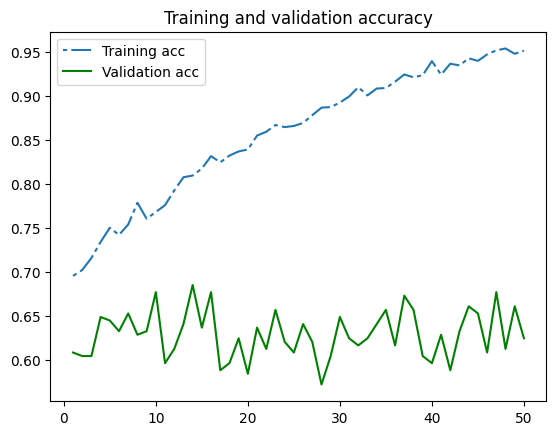

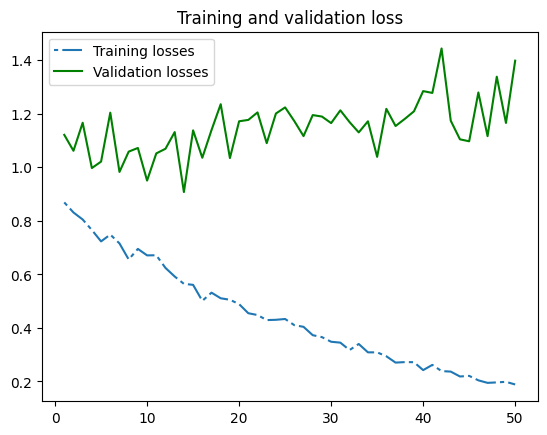

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model w/ VGG 16 + Dropout

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 13/146 ━━━━━━━━━━━━━━━━━━━━ 45:41 21s/step - categorical_accuracy: 0.2167 - loss: 2.3159

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
    optimizer=optimizers.Adam(lr=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=146,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=31)

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model Testing

In [ ]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
image = cv2.imread('E:\\2.jpg')
image.shape

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
image=np.array(cv2.resize(image, (150,150)))
image = image.reshape(1, 150, 150, 3)
image.shape

In [ ]:
np.argmax(model.predict(image))

In [ ]:
result = [[0 for _ in range(7)] for _ in range(7)]

from keras.preprocessing.image import ImageDataGenerator
test_dir ='/content/Val'


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=247  # put batch size == total data
)


data, labels = test_generator.next()
labels = np.argmax(labels, axis=1)

predictions = model.predict(data)
predictions = np.argmax(predictions, axis=1)

for i in range(len(predictions)):
    result[labels[i]][predictions[i]] += 1

result

## Model w/ VGG 19

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=146,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=31)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

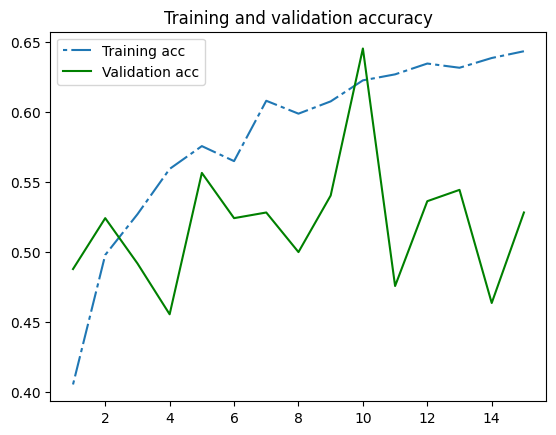

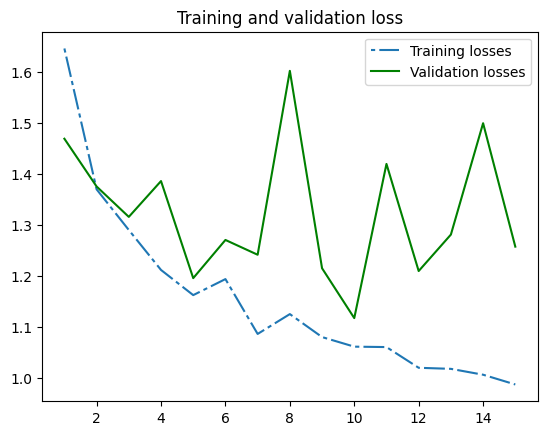

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - categorical_accuracy: 0.6755 - loss: 0.9502 - val_categorical_accuracy: 0.6089 - val_loss: 1.1214
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - categorical_accuracy: 0.7137 - loss: 0.8279 - val_categorical_accuracy: 0.6048 - val_loss: 1.0618
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.7224 - loss: 0.7960 - val_categorical_accuracy: 0.6048 - val_loss: 1.1666
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7407 - loss: 0.7595 - val_categorical_accuracy: 0.6492 - val_loss: 0.9973
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7494 - loss: 0.7328 - val_categorical_accuracy: 0.6452 - val_loss: 1.0214
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7437 - loss: 0.7490 - val_categorical_accuracy: 0.6331 - val_loss: 1.2043
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_a

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.7819 - loss: 0.6470 - val_categorical_accuracy: 0.6290 - val_loss: 1.0586
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - categorical_accuracy: 0.7621 - loss: 0.7056 - val_categorical_accuracy: 0.6331 - val_loss: 1.0723
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7686 - loss: 0.6715 - val_categorical_accuracy: 0.6774 - val_loss: 0.9505
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.7695 - loss: 0.6884 - val_categorical_accuracy: 0.5968 - val_loss: 1.0520
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7951 - loss: 0.6334 - val_categorical_accuracy: 0.6129 - val_loss: 1.0694
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - categorical_accuracy: 0.8087 - loss: 0.5844 - val_categorical_accuracy: 0.6411 - val_loss: 1.1317
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - categorical_accuracy: 0.8303 - loss: 0.5051 - val_categorical_accuracy: 0.6774 - val_loss: 1.0358
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - categorical_accuracy: 0.8277 - loss: 0.5111 - val_categorical_accuracy: 0.5887 - val_loss: 1.1391
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - categorical_accuracy: 0.8409 - loss: 0.4964 - val_categorical_accuracy: 0.5968 - val_loss: 1.2359
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.8368 - loss: 0.5081 - val_categorical_accuracy: 0.6250 - val_loss: 1.0345
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8370 - loss: 0.4946 - val_categorical_accuracy: 0.5847 - val_loss: 1.1721
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8584 - loss: 0.4603 - val_categorical_accuracy: 0.6371 - val_loss: 1.1772
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - categorical_accuracy: 0.8691 - loss: 0.4115 - val_categorical_accuracy: 0.6210 - val_loss: 1.2011
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8683 - loss: 0.4227 - val_categorical_accuracy: 0.6089 - val_loss: 1.2240
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8605 - loss: 0.4275 - val_categorical_accuracy: 0.6411 - val_loss: 1.1727
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.8788 - loss: 0.4068 - val_categorical_accuracy: 0.6210 - val_loss: 1.1167
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8892 - loss: 0.3754 - val_categorical_accuracy: 0.5726 - val_loss: 1.1952
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8841 - loss: 0.3762 - val_categorical_accuracy: 0.6048 - val_loss: 1.1897
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9103 - loss: 0.3233 - val_categorical_accuracy: 0.6169 - val_loss: 1.1691
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9000 - loss: 0.3333 - val_categorical_accuracy: 0.6250 - val_loss: 1.1305
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9123 - loss: 0.3033 - val_categorical_accuracy: 0.6411 - val_loss: 1.1720
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9071 - loss: 0.3049 - val_categorical_accuracy: 0.6573 - val_loss: 1.0391
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9166 - loss: 0.2884 - val_categorical_accuracy: 0.6169 - val_loss: 1.2186
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9241 - loss: 0.2690 - val_categorical_accuracy: 0.6734 - val_loss: 1.1544
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9395 - loss: 0.2378 - val_categorical_accuracy: 0.5968 - val_loss: 1.2848
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9282 - loss: 0.2543 - val_categorical_accuracy: 0.6290 - val_loss: 1.2780
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9361 - loss: 0.2415 - val_categorical_accuracy: 0.5887 - val_loss: 1.4441
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9358 - loss: 0.2401 - val_categorical_accuracy: 0.6331 - val_loss: 1.1741
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9487 - loss: 0.2147 - val_categorical_accuracy: 0.6613 - val_loss: 1.1046
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9426 - loss: 0.2157 - val_categorical_accuracy: 0.6532 - val_loss: 1.0973
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.9518 - loss: 0.2018 - val_categorical_accuracy: 0.6129 - val_loss: 1.3388
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9469 - loss: 0.1952 - val_categorical_accuracy: 0.6613 - val_loss: 1.1657
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9519 - loss: 0.1881 - val_categorical_accuracy: 0.6250 - val_loss: 1.3986


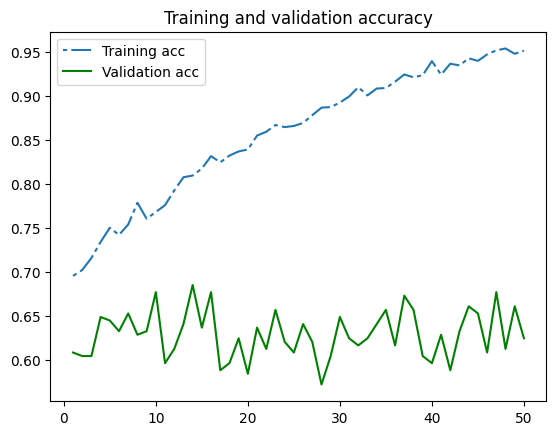

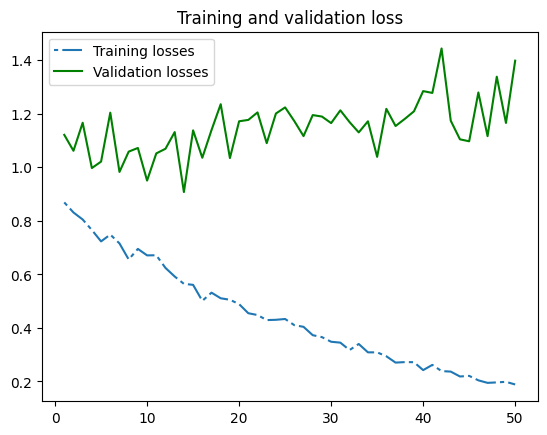

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model w/ VGG 19 Full Build

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

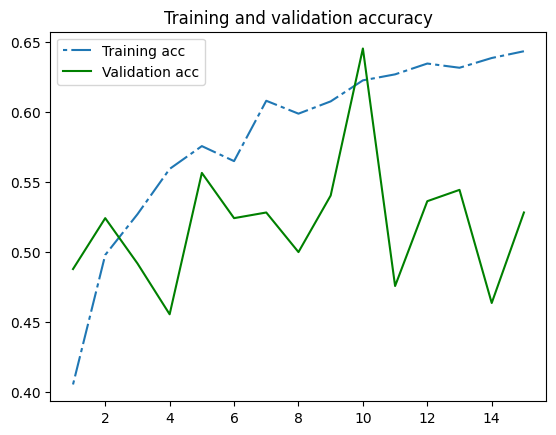

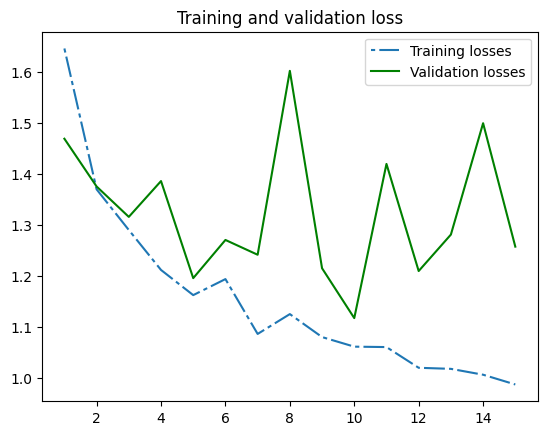

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - categorical_accuracy: 0.6755 - loss: 0.9502 - val_categorical_accuracy: 0.6089 - val_loss: 1.1214
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - categorical_accuracy: 0.7137 - loss: 0.8279 - val_categorical_accuracy: 0.6048 - val_loss: 1.0618
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.7224 - loss: 0.7960 - val_categorical_accuracy: 0.6048 - val_loss: 1.1666
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7407 - loss: 0.7595 - val_categorical_accuracy: 0.6492 - val_loss: 0.9973
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7494 - loss: 0.7328 - val_categorical_accuracy: 0.6452 - val_loss: 1.0214
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7437 - loss: 0.7490 - val_categorical_accuracy: 0.6331 - val_loss: 1.2043
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_a

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.7819 - loss: 0.6470 - val_categorical_accuracy: 0.6290 - val_loss: 1.0586
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - categorical_accuracy: 0.7621 - loss: 0.7056 - val_categorical_accuracy: 0.6331 - val_loss: 1.0723
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7686 - loss: 0.6715 - val_categorical_accuracy: 0.6774 - val_loss: 0.9505
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.7695 - loss: 0.6884 - val_categorical_accuracy: 0.5968 - val_loss: 1.0520
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7951 - loss: 0.6334 - val_categorical_accuracy: 0.6129 - val_loss: 1.0694
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - categorical_accuracy: 0.8087 - loss: 0.5844 - val_categorical_accuracy: 0.6411 - val_loss: 1.1317
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - categorical_accuracy: 0.8303 - loss: 0.5051 - val_categorical_accuracy: 0.6774 - val_loss: 1.0358
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - categorical_accuracy: 0.8277 - loss: 0.5111 - val_categorical_accuracy: 0.5887 - val_loss: 1.1391
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - categorical_accuracy: 0.8409 - loss: 0.4964 - val_categorical_accuracy: 0.5968 - val_loss: 1.2359
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.8368 - loss: 0.5081 - val_categorical_accuracy: 0.6250 - val_loss: 1.0345
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8370 - loss: 0.4946 - val_categorical_accuracy: 0.5847 - val_loss: 1.1721
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8584 - loss: 0.4603 - val_categorical_accuracy: 0.6371 - val_loss: 1.1772
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - categorical_accuracy: 0.8691 - loss: 0.4115 - val_categorical_accuracy: 0.6210 - val_loss: 1.2011
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8683 - loss: 0.4227 - val_categorical_accuracy: 0.6089 - val_loss: 1.2240
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8605 - loss: 0.4275 - val_categorical_accuracy: 0.6411 - val_loss: 1.1727
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.8788 - loss: 0.4068 - val_categorical_accuracy: 0.6210 - val_loss: 1.1167
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8892 - loss: 0.3754 - val_categorical_accuracy: 0.5726 - val_loss: 1.1952
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8841 - loss: 0.3762 - val_categorical_accuracy: 0.6048 - val_loss: 1.1897
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9103 - loss: 0.3233 - val_categorical_accuracy: 0.6169 - val_loss: 1.1691
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9000 - loss: 0.3333 - val_categorical_accuracy: 0.6250 - val_loss: 1.1305
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9123 - loss: 0.3033 - val_categorical_accuracy: 0.6411 - val_loss: 1.1720
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9071 - loss: 0.3049 - val_categorical_accuracy: 0.6573 - val_loss: 1.0391
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9166 - loss: 0.2884 - val_categorical_accuracy: 0.6169 - val_loss: 1.2186
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9241 - loss: 0.2690 - val_categorical_accuracy: 0.6734 - val_loss: 1.1544
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9395 - loss: 0.2378 - val_categorical_accuracy: 0.5968 - val_loss: 1.2848
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9282 - loss: 0.2543 - val_categorical_accuracy: 0.6290 - val_loss: 1.2780
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9361 - loss: 0.2415 - val_categorical_accuracy: 0.5887 - val_loss: 1.4441
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9358 - loss: 0.2401 - val_categorical_accuracy: 0.6331 - val_loss: 1.1741
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9487 - loss: 0.2147 - val_categorical_accuracy: 0.6613 - val_loss: 1.1046
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9426 - loss: 0.2157 - val_categorical_accuracy: 0.6532 - val_loss: 1.0973
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.9518 - loss: 0.2018 - val_categorical_accuracy: 0.6129 - val_loss: 1.3388
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9469 - loss: 0.1952 - val_categorical_accuracy: 0.6613 - val_loss: 1.1657
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9519 - loss: 0.1881 - val_categorical_accuracy: 0.6250 - val_loss: 1.3986


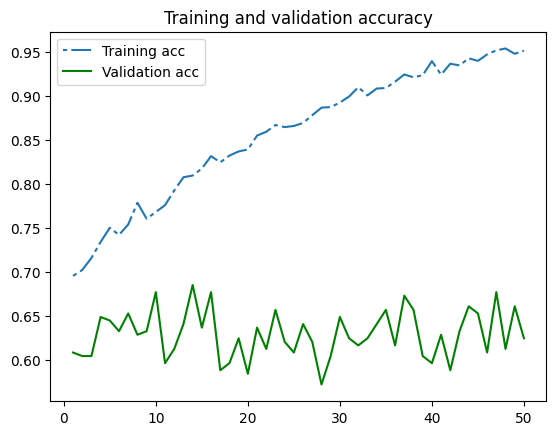

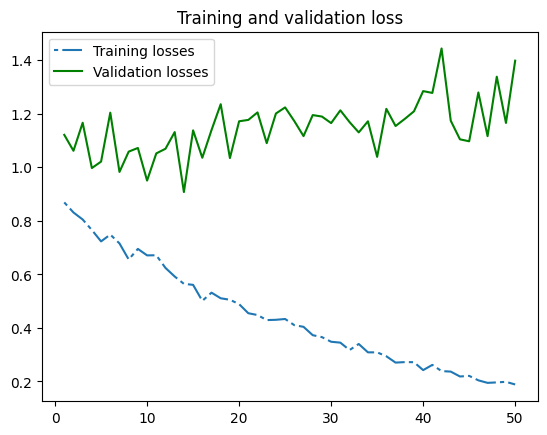

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model w/ ResNet50

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                 include_top=True,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=146,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=31)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

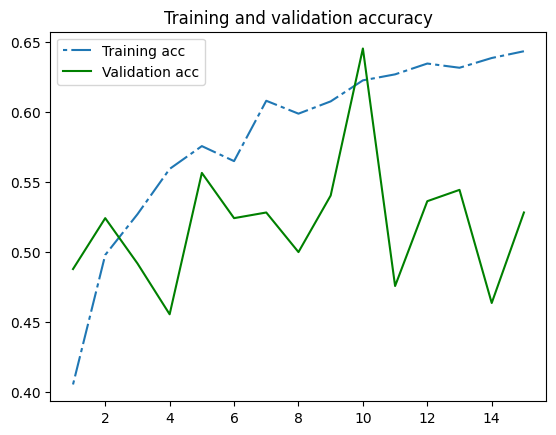

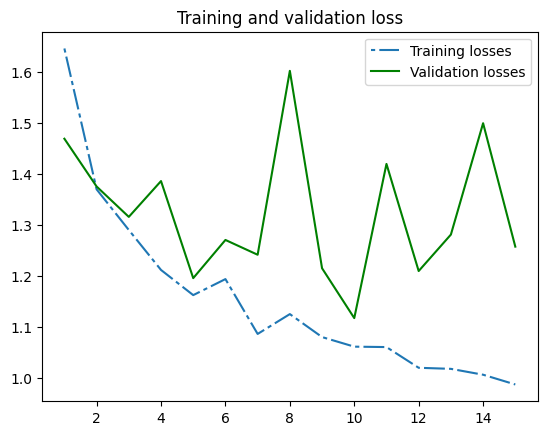

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'res5a_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - categorical_accuracy: 0.6755 - loss: 0.9502 - val_categorical_accuracy: 0.6089 - val_loss: 1.1214
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - categorical_accuracy: 0.7137 - loss: 0.8279 - val_categorical_accuracy: 0.6048 - val_loss: 1.0618
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.7224 - loss: 0.7960 - val_categorical_accuracy: 0.6048 - val_loss: 1.1666
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7407 - loss: 0.7595 - val_categorical_accuracy: 0.6492 - val_loss: 0.9973
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7494 - loss: 0.7328 - val_categorical_accuracy: 0.6452 - val_loss: 1.0214
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7437 - loss: 0.7490 - val_categorical_accuracy: 0.6331 - val_loss: 1.2043
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_a

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.7819 - loss: 0.6470 - val_categorical_accuracy: 0.6290 - val_loss: 1.0586
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - categorical_accuracy: 0.7621 - loss: 0.7056 - val_categorical_accuracy: 0.6331 - val_loss: 1.0723
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accuracy: 0.7686 - loss: 0.6715 - val_categorical_accuracy: 0.6774 - val_loss: 0.9505
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.7695 - loss: 0.6884 - val_categorical_accuracy: 0.5968 - val_loss: 1.0520
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.7951 - loss: 0.6334 - val_categorical_accuracy: 0.6129 - val_loss: 1.0694
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 216ms/step - categorical_accuracy: 0.8087 - loss: 0.5844 - val_categorical_accuracy: 0.6411 - val_loss: 1.1317
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - categorical_accuracy: 0.8303 - loss: 0.5051 - val_categorical_accuracy: 0.6774 - val_loss: 1.0358
Epoch 17/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - categorical_accuracy: 0.8277 - loss: 0.5111 - val_categorical_accuracy: 0.5887 - val_loss: 1.1391
Epoch 18/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - categorical_accuracy: 0.8409 - loss: 0.4964 - val_categorical_accuracy: 0.5968 - val_loss: 1.2359
Epoch 19/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.8368 - loss: 0.5081 - val_categorical_accuracy: 0.6250 - val_loss: 1.0345
Epoch 20/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8370 - loss: 0.4946 - val_categorical_accuracy: 0.5847 - val_loss: 1.1721
Epoch 21/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8584 - loss: 0.4603 - val_categorical_accuracy: 0.6371 - val_loss: 1.1772
Epoch 22/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - categorical_accuracy: 0.8691 - loss: 0.4115 - val_categorical_accuracy: 0.6210 - val_loss: 1.2011
Epoch 25/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - categorical_accuracy: 0.8683 - loss: 0.4227 - val_categorical_accuracy: 0.6089 - val_loss: 1.2240
Epoch 26/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8605 - loss: 0.4275 - val_categorical_accuracy: 0.6411 - val_loss: 1.1727
Epoch 27/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - categorical_accuracy: 0.8788 - loss: 0.4068 - val_categorical_accuracy: 0.6210 - val_loss: 1.1167
Epoch 28/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8892 - loss: 0.3754 - val_categorical_accuracy: 0.5726 - val_loss: 1.1952
Epoch 29/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.8841 - loss: 0.3762 - val_categorical_accuracy: 0.6048 - val_loss: 1.1897
Epoch 30/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9103 - loss: 0.3233 - val_categorical_accuracy: 0.6169 - val_loss: 1.1691
Epoch 33/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9000 - loss: 0.3333 - val_categorical_accuracy: 0.6250 - val_loss: 1.1305
Epoch 34/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9123 - loss: 0.3033 - val_categorical_accuracy: 0.6411 - val_loss: 1.1720
Epoch 35/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9071 - loss: 0.3049 - val_categorical_accuracy: 0.6573 - val_loss: 1.0391
Epoch 36/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9166 - loss: 0.2884 - val_categorical_accuracy: 0.6169 - val_loss: 1.2186
Epoch 37/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9241 - loss: 0.2690 - val_categorical_accuracy: 0.6734 - val_loss: 1.1544
Epoch 38/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - categorical_accuracy: 0.9395 - loss: 0.2378 - val_categorical_accuracy: 0.5968 - val_loss: 1.2848
Epoch 41/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9282 - loss: 0.2543 - val_categorical_accuracy: 0.6290 - val_loss: 1.2780
Epoch 42/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9361 - loss: 0.2415 - val_categorical_accuracy: 0.5887 - val_loss: 1.4441
Epoch 43/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9358 - loss: 0.2401 - val_categorical_accuracy: 0.6331 - val_loss: 1.1741
Epoch 44/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9487 - loss: 0.2147 - val_categorical_accuracy: 0.6613 - val_loss: 1.1046
Epoch 45/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9426 - loss: 0.2157 - val_categorical_accuracy: 0.6532 - val_loss: 1.0973
Epoch 46/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accura

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - categorical_accuracy: 0.9518 - loss: 0.2018 - val_categorical_accuracy: 0.6129 - val_loss: 1.3388
Epoch 49/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.9469 - loss: 0.1952 - val_categorical_accuracy: 0.6613 - val_loss: 1.1657
Epoch 50/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 32s 217ms/step - categorical_accuracy: 0.9519 - loss: 0.1881 - val_categorical_accuracy: 0.6250 - val_loss: 1.3986


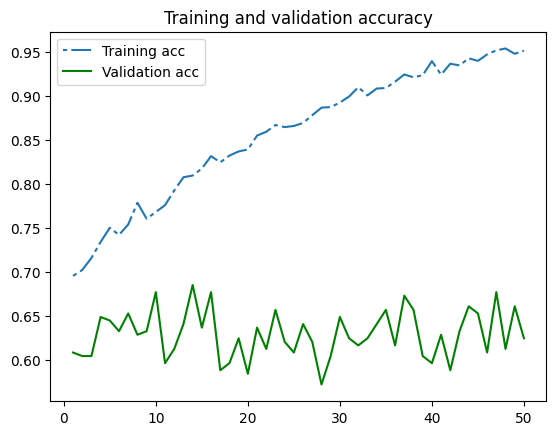

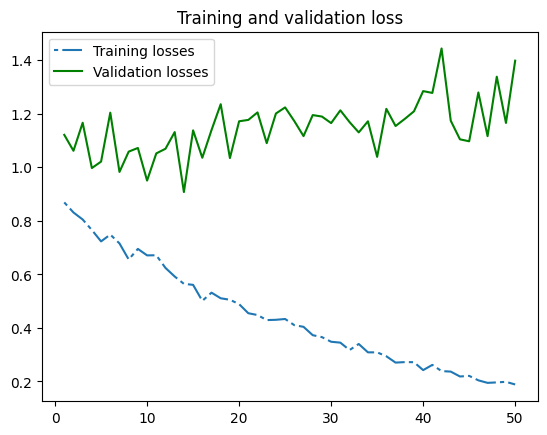

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model w/ ResNet50 Full Build

### Data Engineering

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 35129 images belonging to 7 classes.
Found 8488 images belonging to 7 classes.


### Model Development

#### Arch Build

In [ ]:
from keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                 include_top=True,
                 input_shape=(224, 224, 3))

conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,563,847 (105.15 MB)

 Trainable params: 27,563,847 (105.15 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Train

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

print(steps_per_epoch)
print(validation_steps)

conv_base.trainable = True
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - categorical_accuracy: 0.3494 - loss: 1.9060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 44s 206ms/step - categorical_accuracy: 0.3498 - loss: 1.9043 - val_categorical_accuracy: 0.4879 - val_loss: 1.4694
Epoch 2/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 36s 250ms/step - categorical_accuracy: 0.4863 - loss: 1.3823 - val_categorical_accuracy: 0.5242 - val_loss: 1.3757
Epoch 3/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5133 - loss: 1.3119 - val_categorical_accuracy: 0.4919 - val_loss: 1.3162
Epoch 4/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.5448 - loss: 1.2452 - val_categorical_accuracy: 0.4556 - val_loss: 1.3864
Epoch 5/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.5746 - loss: 1.1671 - val_categorical_accuracy: 0.5565 - val_loss: 1.1961
Epoch 6/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.5620 - loss: 1.1891 - val_categorical_accuracy: 0.5242 - val_loss: 1.2709
Epoch 7/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - categorical_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


146/146 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - categorical_accuracy: 0.5959 - loss: 1.1364 - val_categorical_accuracy: 0.5000 - val_loss: 1.6024
Epoch 9/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 82s 302ms/step - categorical_accuracy: 0.5969 - loss: 1.1213 - val_categorical_accuracy: 0.5403 - val_loss: 1.2154
Epoch 10/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6262 - loss: 1.0475 - val_categorical_accuracy: 0.6452 - val_loss: 1.1177
Epoch 11/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6299 - loss: 1.0545 - val_categorical_accuracy: 0.4758 - val_loss: 1.4200
Epoch 12/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - categorical_accuracy: 0.6358 - loss: 1.0047 - val_categorical_accuracy: 0.5363 - val_loss: 1.2100
Epoch 13/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.6446 - loss: 0.9954 - val_categorical_accuracy: 0.5444 - val_loss: 1.2814
Epoch 14/15
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - categorical_accurac

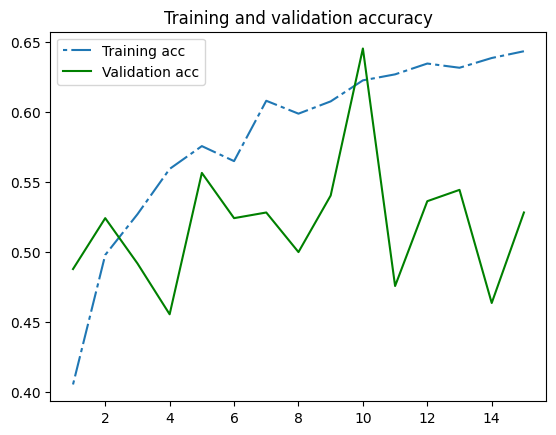

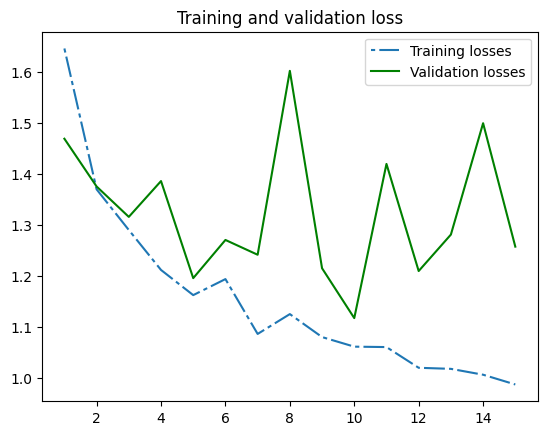

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()